In [2]:
#change this cell to change season and player name
season = ['2017/2018','2018/2019','2019/2020']
ssn = '0506'
length = int(20)

In [3]:
import os
import json
import StatsbombPitch as sb
#from pandas.io.json import json_normalize
import codecs
import seaborn as sns
import pandas as pd
import codecs
import StatsbombPitch as sb

main_df = pd.DataFrame(data=None)
path_match = "/home/kirugulige/Documents/Football-Analytics/open-data-master/data/events/" #location for play by play events
for root, dirs, files in os.walk('/home/kirugulige/Documents/Football-Analytics/open-data-master/data/matches'):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            with codecs.open(root + str('/') + file,encoding='utf-8') as data_file:
                data = json.load(data_file)
                df = pd.DataFrame(data=None)
                df = pd.json_normalize(data, sep = "_")
            #for x in df.competition_country_name:
            #    if x == 'Spain':
            #        print(df.match_id)
            for i in range(len(df)):
                if df.iloc[i]['competition_country_name'] == 'Spain'  and df.iloc[i]['season_season_name'] in season :
                    match_no = df.iloc[i]['match_id'] #gets match with Spain as country
                    match_no = str(match_no) # from int to str 
                    #print('match list \n',match_no)
                    with codecs.open(path_match + match_no + str(r'.json'),encoding="utf8") as event_file: #open the respective file
                        df_match = json.load(event_file)
                        df_match2 = pd.DataFrame(data=None)
                        df_match2 = pd.json_normalize(df_match,sep="_")    
                        df_match2 =  df_match2[(df_match2['type_name'] == "Shot") & (df_match2['team_name'] == 'Barcelona')]
                    main_df = main_df.append(df_match2,ignore_index=True,sort=False)                    
#print('total matches ',len(match_no)) 
print('Done')

Done


In [4]:
#main_df['player_name'].value_counts()
df = main_df.loc[:,['location','shot_body_part_id','shot_end_location','shot_outcome_id','player_name','player_id']]

In [ ]:
df['player_name'].value_counts()

In [ ]:
df['shot_outcome_id'].value_counts()

In [5]:
#df_goal = df[(df['shot_outcome_id'] == 97) ]
#df_shot = df[(df['shot_outcome_id'] != 97) ]

df_goal = df[(df['shot_outcome_id'] == 97) & (df['player_id'] == 5503.0)] #for messi
df_shot = df[(df['shot_outcome_id'] != 97) & (df['player_id'] == 5503.0)] #for messi
df_goal.head()

,location,shot_body_part_id,shot_end_location,shot_outcome_id,player_name,player_id
3,"[99.1, 44.1]",38.0,"[120.0, 36.6, 2.2]",97.0,Lionel Andrés Messi Cuccittini,5503.0
48,"[94.7, 51.6]",38.0,"[120.0, 42.4, 0.4]",97.0,Lionel Andrés Messi Cuccittini,5503.0
49,"[106.7, 36.8]",38.0,"[120.0, 37.9, 0.1]",97.0,Lionel Andrés Messi Cuccittini,5503.0
54,"[114.1, 41.1]",38.0,"[120.0, 39.0, 1.8]",97.0,Lionel Andrés Messi Cuccittini,5503.0
62,"[109.3, 32.0]",38.0,"[120.0, 40.9, 0.2]",97.0,Lionel Andrés Messi Cuccittini,5503.0


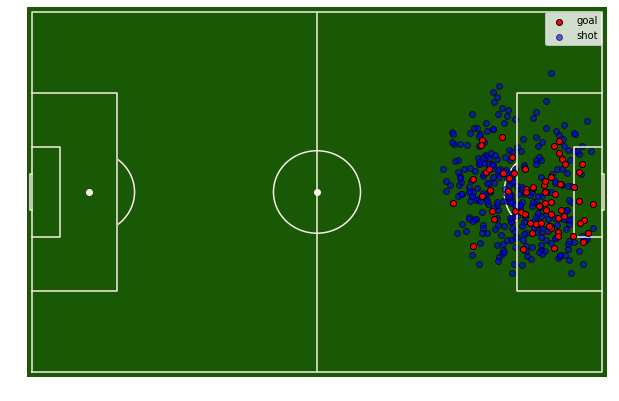

In [34]:
import StatsbombPitch as sb
sb.sb_pitch("#195905","#faf0e6","horizontal","full")

for i in range(len(df_goal)):
    xe = df_goal.iloc[i]['location'][0]
    ye = df_goal.iloc[i]['location'][1]
    g = plt.scatter(xe,ye,color="red",edgecolors="black",zorder=10,alpha=1)
for i in range(len(df_shot)):
    xe = df_shot.iloc[i]['location'][0]
    ye = df_shot.iloc[i]['location'][1]
    s = plt.scatter(xe,ye,color="blue",edgecolors="black",zorder=5,alpha=0.6) 
plt.legend((g,s),('goal','shot'),scatterpoints=1,loc=0)    
plt.show()

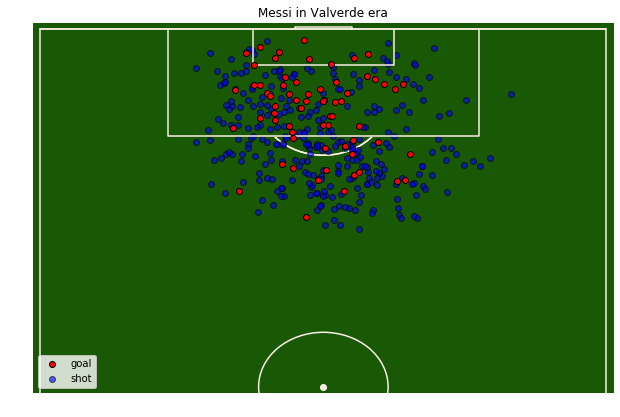

In [32]:
import StatsbombPitch as sb
sb.sb_pitch("#195905","#faf0e6","vertical","half")

for i in range(len(df_goal)):
    xe = df_goal.iloc[i]['location'][0]
    ye = df_goal.iloc[i]['location'][1]
    g = plt.scatter(ye,xe,color="red",edgecolors="black",zorder=10,alpha=1)
for i in range(len(df_shot)):
    xe = df_shot.iloc[i]['location'][0]
    ye = df_shot.iloc[i]['location'][1]
    s = plt.scatter(ye,xe,color="blue",edgecolors="black",zorder=5,alpha=0.6) 
plt.title('Messi in Valverde era') 

#ax = plt.subplot()
plt.legend((g,s),('goal','shot'),scatterpoints=1,loc=0)
plt.savefig('MessiValverdeEraScatter.png')
plt.show()

In [ ]:
#type(df_goal.iloc[0]['location'])
dfj = pd.DataFrame(df_goal['location'].values.tolist(), columns=['x','y'])
dfj.head()

In [ ]:
import numpy as np
hmap = dfj.to_numpy()

In [ ]:
hdraw_pitch("#195905","#faf0e6","vertical","half")
#plt.gca().invert_xaxis()
sns.kdeplot(dfj.y,dfj.x, cmap="YlOrRd", shade=True,shade_lowest = False,zorder = 20)
plt.title('Barca Valverde era')  
plt.show()

#plt.savefig('BarcaEnriqueeraheatmap.png')

In [ ]:
import seaborn as sns
fig=plt.figure() #set up the figures
fig.set_size_inches(12, 8)
ax=fig.add_subplot(1,1,1)

ax.set_facecolor('grey')
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
plt.gca().invert_yaxis()
sns.kdeplot(dfj.x,dfj.y, cmap="YlOrRd", shade=True,shade_lowest = False,n_levels=40)
#plt.hexbin(dfj.x, dfj.y,gridsize=(100,100))
#sns.jointplot(x=dfj['x'], y=dfj['y'],  kind="kde", space=0, color="r",dropna='True');
plt.show()